<a href="https://colab.research.google.com/github/kanhaz-spec/MACHINE-LEARNING/blob/main/_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from itertools import combinations

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 5 samples:\n", X[:5])
print("\nFirst 5 labels:\n", y[:5])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 5 samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

First 5 labels:
 [0 0 0 0 0]


In [4]:
plot_colors = "ryb"
plot_step = 0.02

In [5]:
plt.figure(figsize=(12, 10))
pair_index = 1

<Figure size 1200x1000 with 0 Axes>

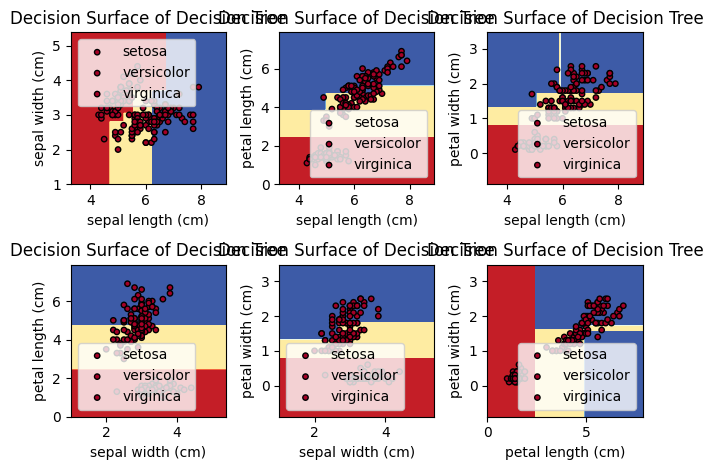

In [10]:
pair_index = 1
for pair in combinations(range(4), 2):
    X_pair = X[:, pair]
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
    clf.fit(X_pair, y)

    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    plt.subplot(2, 3, pair_index)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])

    for i, color in zip(range(len(target_names)), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=y[idx], label=target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.title('Decision Surface of Decision Tree')
        plt.legend()
        plt.tight_layout()
    pair_index += 1

plt.show()

In [12]:
x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
         np.arange(y_min, y_max, plot_step))

In [13]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

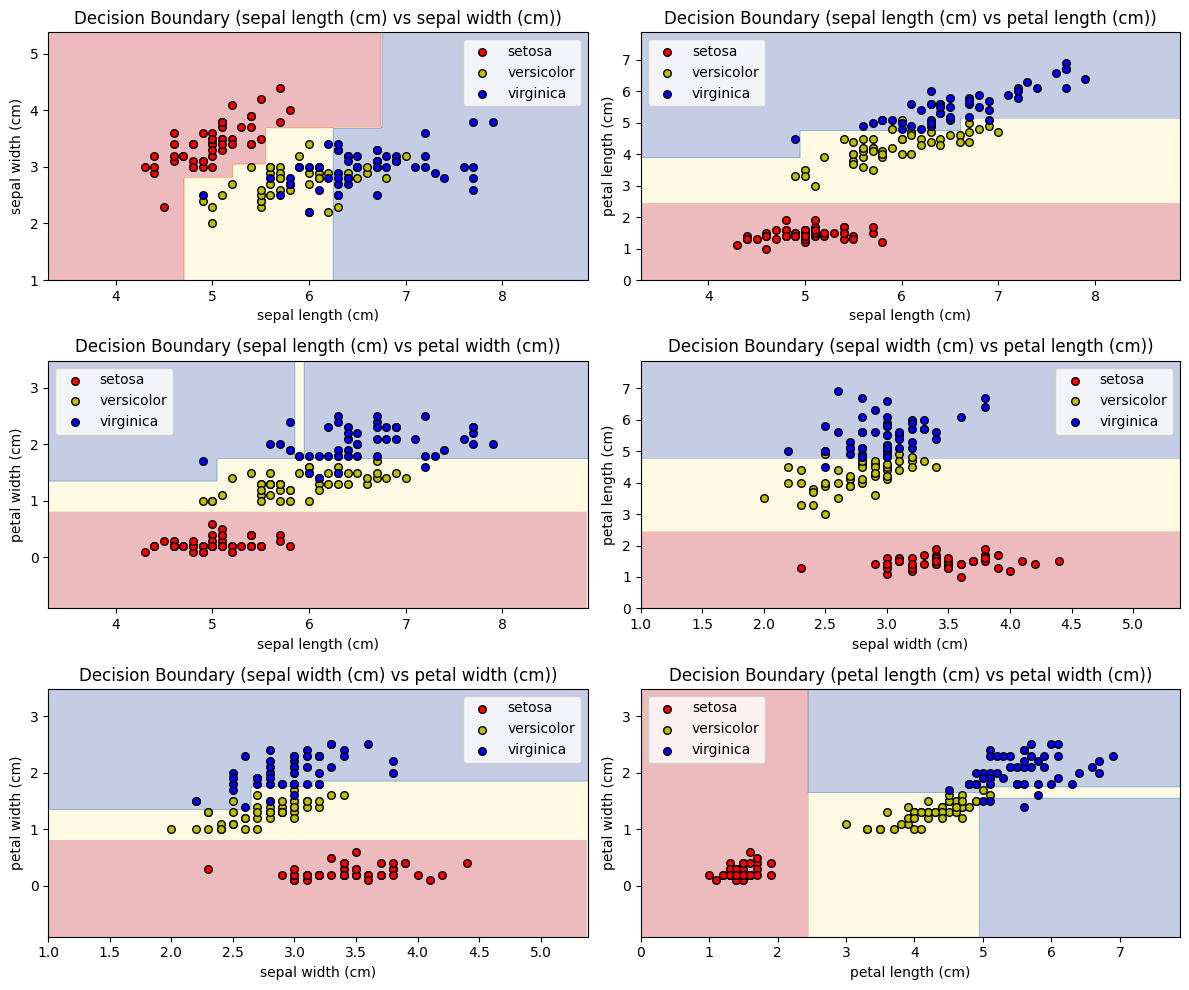

In [14]:
plt.figure(figsize=(12, 10))

for pair_index, pair in enumerate(combinations(range(4), 2), start=1):
    X_pair = X[:, pair]
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
    clf.fit(X_pair, y)

    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot(3, 2, pair_index)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    plot_colors = "ryb"
    for i, color in zip(range(3), plot_colors):
        plt.scatter(X_pair[y == i, 0], X_pair[y == i, 1],
        c=color, label=target_names[i], edgecolor='k', s=30)

        plt.xlabel(feature_names[pair[0]])
        plt.ylabel(feature_names[pair[1]])
        plt.title(f"Decision Boundary ({feature_names[pair[0]]} vs {feature_names[pair[1]]})")
        plt.legend()

        plt.tight_layout()
plt.show()